# Notebook aula


 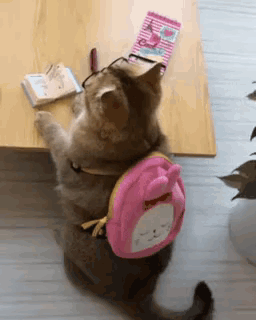

## 1. IMPORTAÇÃO E COMPREENSÃO DOS DADOS

In [36]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\funar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
import re
import numpy as np

In [45]:
import re

In [46]:
try:
    teste = re.compile(r'test')
    print("✅ re.compile() está funcionando!")
except Exception as e:
    print(f"❌ Erro: {e}")

✅ re.compile() está funcionando!


### 1.1 Estrutura do dataset

Nosso dataset (`dataset_clinica20252.csv`) contém **19.800 observações** com as seguintes colunas:

| Campo | Descrição | Características |
|-------|-----------|----------------|
| `cd_causa` | Código identificador do caso | 10 caracteres, formato: CIB + números |
| `cd_atendimento` | Número do processo | 25 caracteres, formato: NNNNNN-XX.YYYY.Z.AA.BBBB |
| `ds_Acao_Judicial` | Tipo da ação | Predominantemente "90 - ACAO DE REPARACAO DE DANOS" |
| `ds_fatos` | Descrição dos fatos | Texto longo (até 5.000 caracteres) |
| `ds_Pedidos` | Pedidos do autor | Texto longo (até 5.000 caracteres) |
| `ds_Qualificacao` | Qualificação das partes | Dados das partes envolvidas |

In [37]:
# Importação do dataset
df = pd.read_csv('dataset_clinica20252.csv', delimiter='|', encoding='utf-8')

### Verificação pós importação 

In [ ]:
# FUNÇÃO: len()
# O QUE FAZ: conta o número de linhas (registros) no DataFrame
# SINTAXE: len(dataframe)


19800

In [4]:

len(df)

19800

In [5]:
# FUNÇÃO: list()
# O QUE FAZ: converte o índice(nome da coluna) das colunas em uma lista que 
# podemos ler facilmente
# SINTAXE: list(df.columns)

In [5]:
list(df.columns)

['cd_causa',
 'cd_atendimento',
 'ds_Acao_Judicial',
 'ds_fatos',
 'ds_Pedidos',
 'ds_Qualificacao']

#### Número de NAs

In [ ]:
# FUNÇÃO: df.dropna()
# O QUE FAZ: remove todas as linhas que têm pelo menos um valor vazio (NaN)
# SINTAXE: df.dropna()

# FUNÇÃO: .shape[0]
# O QUE FAZ: retorna o número de linhas do DataFrame resultante
# SINTAXE: dataframe.shape[0]

#df.dropna().shape[0]

In [6]:
df.dropna().shape[0]

19799

## 2. NORMALIZAÇÃO E LIMPEZA DOS DADOS 

In [7]:
# FUNÇÃO: df.head()
# O QUE FAZ: mostra as primeiras 5 linhas do DataFrame
# SINTAXE: df.head(numero_de_linhas)

In [31]:
df.head(3)

,cd_causa,cd_atendimento,ds_Acao_Judicial,ds_fatos,ds_Pedidos,ds_Qualificacao
0,CIB0500064,0825789-84.2025.8.18.0140,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS A parte Autora, pessoa idosa e hipossuficiente, é aposentada pelo ...","DOS PEDIDOS Ante ao exposto, requer: a) Sejam concedidos os benefícios da JU...",DOUTO JUÍZO DE DIREITO DA ___ VARA CÍVEL DA COMARCA DE TERESINA  ESTADO DO ...
1,CIB0505587,1004697-72.2025.8.26.0066,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS 5. A parte autora é pessoa idosa, hipossuficiente, percebendo uma ...","DOS PEDIDOS E REQUERIMENTOS 33. Diante do exposto, requer: a) Conceder o ben...",(17) 99779-9177 / EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO DA __ VARA CÍ...
2,CIB0508201,0800423-07.2025.8.15.0761,90 - ACAO DE REPARACAO DE DANOS,DOS FATOS 1. SITUAÇÃO DE VULNERABILIDADE DO CONSUMIDOR 2. DESCONTOS ILÍCITOS...,"DOS PEDIDOS E REQUERIMENTOS Ex Positis, requer a Vossa Excelência: a) A cita...",AO COLENDO JUÍZO DA VARA ÚNICA DA COMARCA DE GURINHÉM  PARAÍBA. DECLARATÓRI...


In [6]:
# FUNÇÃO: df['coluna'].str.contains()
# O QUE FAZ: busca por padrões específicos dentro de uma coluna de texto
# SINTAXE: df['coluna'].str.contains('padrão')

In [8]:
problemas_encoding = df['ds_fatos'].str.contains('Ãª|Ã©|Ã¡|Ã³|Ã­|Ãº|Ã§|Ã£|©', \
                                                 na=False)


problemas_encoding.sum()

np.int64(9)

In [9]:
print(df[problemas_encoding]['ds_fatos'])

836      FATOR RH ***** OBSERVAÇÃO ** ÓRGÃO EXPEDIDOR S...
10499    Processo no 0000032-93.2025.8.05.0137 Classe: ...
11083    BANCO SANTANDER NÃO RESOLVIDA Esta reclamação ...
11799    FATO-PEDIDO Alega a parte autora, que no dia 2...
11896    P4763300000466076491 ID do documento: 48530686...
13165    DOS FATOS A parte autora relatou que recebe be...
14147    DOS FATOS A autora relata que foi surpreendida...
14923    FATOS RECLAMADOS Eu, Marifney Santos de Jesus,...
17442    DOS FATOS Em janeiro do corrente ano, a Autora...
Name: ds_fatos, dtype: object


### Função para ver o inteiro teor da célula

In [10]:
import textwrap

for indice, texto in df[problemas_encoding]['ds_fatos'].head(5).items():
    print(f"Registro {indice}:")
    print(textwrap.fill(texto, width=80))
    print("-" * 80)

Registro 836:
FATOR RH ***** OBSERVAÇÃO ** ÓRGÃO EXPEDIDOR SESDS-PB PASIL Alexsandra Loourings
Primo Mendonça ASSINATURA DO TITULAR CARTEIRA DE IDENTIDADE Indústria Gráfica
Brasileira Ltda CARTEIRAL CIDENTIDADE CARTE RADED CARTEIRADE IDENTIDADELANTERADE
DENTIDADE CARTEIRAS DENTIDADE CARTE RACE DENTIDADECARTEIRADE IDENTIDADE
CANTERADE DENTIDADECARTEIRADE DENTIDADECARTEIRADEIDENTIDADECARTEIRADEIDENTIDADE
CARTEIRADEIDENTIDADE CARTE RADE IDENTIDADECARTEIRADE IDENTIDADECARTE
RADEIDENTIDADE LEI No 7.116 DE 29 DE AGOSTO DE 1983 CPF 052.286.844-41 DNI
********** REGISTRO GERAL 2.536.183 2a VIA REGISTRO CIVIL DATA DE EXPEDIÇÃO
31/07/2023 CERT. CAS. N°4777 - LIV.B-15 - FLS.012V - CARTORIO ALAGOA GRANDE-PB
T. ELEITOR 024147551295 CTPS **** NIS/PIS/PASEP 20985705080 CERT MILITAR
********** CNH ** SÉRIE **** UF ** POLEGAR DIREITO IDENTIDADE PROFISSIONAL CNS
*** 700501976617057 Acidio Pereira Furtado Chefe do Núcleo de Ident ASSINATURA
DO DIRETOR NUICC-PB P-66 VALIDA EM TODO O TERRITORIO NACIONAL RA

### Verificar problemas com espaçamento

In [20]:
problemas_espaco = df['ds_fatos'].str.contains('  +', \
                                                 na=False)


problemas_espaco.sum()

np.int64(0)

In [17]:
import textwrap

for indice, texto in df[problemas_espaco]['ds_fatos'].head(5).items():
    print(f"Registro {indice}:")
    print(textwrap.fill(texto, width=80))
    print("-" * 80)

Registro 1:
DOS FATOS 5. A parte autora é pessoa idosa, hipossuficiente, percebendo uma
ínfima renda de seu benefício previdenciário registrado sob o n° 171.123.404-1
Pensão por Morte Previdenciaria. 6. Analisando os extratos de pagamento de sua
conta junto ao banco requerido, descobriu que havia descontos irregulares,
referente a um suposto seguro denominado como SERVICO CARTAO PROTEGIDO., o
qual lhe impõe descontos no importe de R$ 9,99 (nove reais e noventa e nove
centavos) seguro este que a parte autora jamais solicitou e, tampouco, sabia de
sua existência. Vejamos: 7. Diante de tal impasse, a parte autora entrou em
contato com o Banco Requerido, alegando que não se recordava de ter contratado
tal seguro, exigindo a devolução dos valores indevidamente cobrados bem como
cópia dos contratos. Contudo a empresa ré alegou a impossibilidade da devolução
dos valores. 8. A autora vem sofrendo com uma verdadeira farra de cobrança de
suposto seguro não contratado, e nesta oportunidade 

In [18]:
caracteres_corrompidos = df['ds_fatos'].str.contains('', na=False)
caracteres_corrompidos.sum()

np.int64(0)

### Limpar espacamento duplo e símbolo 

In [ ]:
# FUNÇÃO: df['coluna'].str.replace()
# O QUE FAZ: substitui caracteres específicos por outros
# SINTAXE: df['coluna'].str.replace('caractere_antigo', 'caractere_novo')

In [14]:
#COMPLETAR: caracteres específicos

df['ds_fatos'] = df['ds_fatos'].str.replace('', '')
df['ds_Pedidos'] = df['ds_Pedidos'].str.replace('', '')


In [ ]:
# FUNÇÃO: df['coluna'].str.replace() com regex
# O QUE FAZ: substitui múltiplos espaços por um único espaço
# SINTAXE: df['coluna'].str.replace('padrão_regex', 'substituto', regex=True)

In [19]:
#COMPLETAR: espacamento duplo
#padrao_regex - string raw: r'\s+'

df['ds_fatos'] = df['ds_fatos'].str.replace(r'\s+', ' ', regex=True)
df['ds_Pedidos'] = df['ds_Pedidos'].str.replace(r'\s+', ' ', regex=True)

## 3. EXPRESSÕES REGULARES APLICADAS

In [21]:
"""
Ver valores únicos como output direto
"""

# FUNÇÃO: df['coluna'].unique()
# O QUE FAZ: retorna array com todos os valores únicos da coluna
# SINTAXE: df['coluna'].unique()

valores_unicos_fatos = df['ds_fatos'].unique()


# Para ver o output, simplesmente chame a variável:
valores_unicos_fatos

array(['DOS FATOS A parte Autora, pessoa idosa e hipossuficiente, é aposentada pelo INSS e percebe o valor mensal bruto de um salário mínimo. A Requerente recebe a referida quantia em seu cartão de conta corrente do referido Banco Requerido. Ocorre que desde janeiro de 2020, vem sendo descontado valores referente à GASTOS DE CARTÃO DE CRÉDITO imputado em sua conta corrente (EXTRATOS EM ANEXO). Acontece que a parte Autora não contratou e não utiliza cartão de crédito nenhum do banco Requerido, desconhecendo a origem dos descontos feitos por parte do Requerido. Ressalta-se, Vossa Excelência, que o único intuito da referida conta da parte Requerente é o recebimento e saque do seu benefício, conforme extratos da conta com as movimentações em anexo, e ao invés de ser fornecido uma conta benefício para o mesmo, foi aberta uma conta corrente em seu nome, utilizando-se de sua falta de conhecimentos técnicos. É importante ressaltar que a parte Requerente é pessoa idosa, de conhecimentos técnico

In [22]:
#:10 apenas os 10 primeiros

for indice, texto in enumerate(valores_unicos_fatos[:1000]):
    print(f"valor único {indice + 1}")
    print(textwrap.fill(str(texto), width=80))
    print("-" * 80)

valor único 1
DOS FATOS A parte Autora, pessoa idosa e hipossuficiente, é aposentada pelo INSS
e percebe o valor mensal bruto de um salário mínimo. A Requerente recebe a
referida quantia em seu cartão de conta corrente do referido Banco Requerido.
Ocorre que desde janeiro de 2020, vem sendo descontado valores referente à
GASTOS DE CARTÃO DE CRÉDITO imputado em sua conta corrente (EXTRATOS EM ANEXO).
Acontece que a parte Autora não contratou e não utiliza cartão de crédito nenhum
do banco Requerido, desconhecendo a origem dos descontos feitos por parte do
Requerido. Ressalta-se, Vossa Excelência, que o único intuito da referida conta
da parte Requerente é o recebimento e saque do seu benefício, conforme extratos
da conta com as movimentações em anexo, e ao invés de ser fornecido uma conta
benefício para o mesmo, foi aberta uma conta corrente em seu nome, utilizando-se
de sua falta de conhecimentos técnicos. É importante ressaltar que a parte
Requerente é pessoa idosa, de conhecimentos t

In [ ]:
# FUNÇÃO: re.compile()
# O QUE FAZ: cria padrão que busca empréstimo E consignado no mesmo texto
# SINTAXE: re.compile(r'padrão')

In [23]:
#COMPLETAR:
padrao_emprestimo_consignado = re.compile(r'empréstimo\sconsignado|empréstimo\spor\sconsignação|' \
                                          r'empréstimos\sconsignados|contrato\sde\sconsignação')

In [ ]:
# FUNÇÃO: for loop com findall()
# O QUE FAZ: percorre cada linha aplicando findall() diretamente
# SINTAXE: for texto in df['coluna']

In [24]:
#COMPLETAR: 
resultados = []

for texto in df['ds_fatos']:
    matches = padrao_emprestimo_consignado.findall(texto)
    if len(matches) > 0:
        resultados.append(True)
    else:
        resultados.append(False)



TypeError: expected string or bytes-like object, got 'float'

### Como resolvemos o erro acima?

In [ ]:
# FUNÇÃO: for loop com verificação de tipo
# O QUE FAZ: percorre cada linha verificando se é texto antes de aplicar findall()
# SINTAXE: for texto in df['coluna'] com isinstance()
# A função isinstance(texto, str) verifica se o valor é string antes de aplicar o regex, / 
# evitando o erro com valores float/NaN.

In [25]:
#COMPLETAR COM isinstance

resultados = []

for texto in df['ds_fatos']:
    if isinstance (texto, str): 
        matches = padrao_emprestimo_consignado.findall(texto)
        if len(matches) > 0:
            resultados.append(True)
        else:
            resultados.append(False)
    else:
       resultados.append(False)


In [ ]:
# FUNÇÃO: df['nova_coluna'] = lista
# O QUE FAZ: cria nova coluna no DataFrame com os valores da lista
# SINTAXE: df['nome_coluna'] = lista_valores
# FUNÇÃO: sum()
# O QUE FAZ: soma todos os valores True da coluna (conta quantos são True)
# SINTAXE: sum(df['coluna_booleana'])

In [26]:
#COMPLETAR
df['eh_emprestimo_consignado'] = resultados
df['eh_emprestimo_consignado'].sum()

np.int64(5937)

In [27]:
# FUNÇÃO: df['coluna'].value_counts()
# O QUE FAZ: conta frequência absoluta de cada valor único na coluna
# SINTAXE: df['coluna'].value_counts()

df['eh_emprestimo_consignado'].value_counts()

eh_emprestimo_consignado
False    13863
True      5937
Name: count, dtype: int64

### Será que classificamos corretamente?

In [28]:
registros_consignado = df[df['eh_emprestimo_consignado'] == True]



for indice, texto in enumerate(registros_consignado['ds_fatos'][:20]):
    print(f"valor único {indice + 1}")
    print(textwrap.fill(str(texto), width=80))
    print("-" * 80)

valor único 1
DOS FATOS A parte requerente é pessoa idosa, de escassos recursos financeiros,
sendo que a sua única fonte de renda é proveniente do benefício que recebem
junto ao INSS, depositados mensalmente no Banco Requerido. Assim como prevê a
legislação, a parte Requerente possuía uma conta corrente com pacote de tarifas
zero, junto ao Requerido. Contudo, sua conta corrente com tarifas zero, nos
termos autorizado e previsto pelo Banco Central, foi alterado e passou a sofrer
descontos de tarifas bancárias com a nomenclatura CESTA B. EXPRESSO4, com
parcela mensal no valor de R$ 62,4 (sessenta e dois reais e quarenta centavos),
sendo descontadas, segundo informações da parte desde 13/09/2021, que
corresponde a 40 parcelas não prescritas, totalizando em um valor de R$ 2496
(dois mil, quatrocentos e noventa e seis reais) até o presente momento. Insta
mencionar que a alteração na conta da parte requerente causou prejuízos sem
precedentes, pois a mudança possibilitou ao Banco requerido 

## 4. VALIDAÇÃO DO MODELO

### 4.1. Estatísticas gerais do dataset

In [29]:
"""
Estatísticas gerais do dataset
"""

# FUNÇÃO: sum() e len()
# O QUE FAZ: calcula totais e percentuais
# SINTAXE: sum(coluna) / len(df)

total_processos = len(df)
processos_consignado = sum(df['eh_emprestimo_consignado'])
percentual = (processos_consignado / total_processos) * 100

print(f"=== ESTATÍSTICAS GERAIS ===")
print(f"Total de processos: {total_processos}")
print(f"Processos de crédito consignado: {processos_consignado}")
print(f"Percentual: {percentual:.1f}%")

=== ESTATÍSTICAS GERAIS ===
Total de processos: 19800
Processos de crédito consignado: 5937
Percentual: 30.0%


### 4.2. VALIDAÇÃO POR PALAVRAS-CHAVE ESPECÍFICAS

In [30]:
# Casos que DEVEM ser pegos (teste de recall)
"""
Calcular percentual de textos óbvios capturados pelo regex
"""

# FUNÇÃO: df[df['coluna'].str.contains()]
# O QUE FAZ: filtra textos que contêm 'empréstimo consignado' literalmente
# SINTAXE: df[df['coluna'].str.contains('termo', na=False)]

textos_obvios = df[df['ds_fatos'].str.contains('empréstimo consignado', na=False)]

# FUNÇÃO: sum()
# O QUE FAZ: conta quantos textos óbvios o regex identificou como True
# SINTAXE: sum(coluna_booleana)

capturados = sum(textos_obvios['eh_emprestimo_consignado'])

# Percentual de textos óbvios que foram capturados
percentual_capturados = (capturados / len(textos_obvios)) * 100

print(f"Total de textos óbvios: {len(textos_obvios)}")
print(f"Capturados pelo regex: {capturados}")
print(f"Percentual capturado: {percentual_capturados:.1f}%")

Total de textos óbvios: 4715
Capturados pelo regex: 4715
Percentual capturado: 100.0%


## 5. UMA DICA: olhem para o número do processo

# 🏛️ ANÁLISE DO NÚMERO CNJ
## Extração de Tribunal e Ano do Processo usando RegExp



### 📋 O que vamos aprender:
- Estrutura da numeração única CNJ
- Como extrair o tribunal usando regex
- Como extrair o ano do processo
- Aplicação prática no dataset

## 🔍 Estrutura da Numeração CNJ

A numeração única CNJ segue o padrão: **NNNNNNN-DD.AAAA.J.TR.OOOO**

| Campo | Descrição | Exemplo |
|-------|-----------|----------|
| **NNNNNNN** | Número sequencial do processo | 0825789 |
| **DD** | Dígitos verificadores | 84 |
| **AAAA** | **ANO do ajuizamento** | 2025 |
| **J** | Segmento do Judiciário | 8 (Justiça Estadual) |
| **TR** | **TRIBUNAL** | 18 (TJES - Espírito Santo) |
| **OOOO** | Unidade de origem | 0140 |


### 📍 Códigos dos Segmentos (J):
- **1**: STF
- **2**: CNJ  
- **3**: STJ
- **4**: Justiça Federal
- **5**: Justiça do Trabalho
- **6**: Justiça Eleitoral
- **7**: Justiça Militar da União
- **8**: **Justiça Estadual** ⭐
- **9**: Justiça Militar Estadual

In [35]:
df['cd_atendimento'].dtype

dtype('O')

### Extraindo anos

In [51]:
# Criar listas vazias para armazenar resultados

# Criar padrão regex para capturar o ano

padrao_ano = re.compile('\d{7}-\d{2}\.(\d{4})\.\d.\d{2}\.\d{4}')

# Criar uma lista para armazenar resultados

anos = []

#Loop pelos números de processo

for numero in df['cd_atendimento']:
    if isinstance(numero, str):
        #usar findall para capturar o ano
        matches = padrao_ano.findall(numero)
        if len(matches) > 0:
            ano = int(matches[0]) # pega o primeiro e único match
            anos.append(ano)
    else:
        anos.append(None)

df['ano'] = anos



In [52]:
df.head(7)

,cd_causa,cd_atendimento,ds_Acao_Judicial,ds_fatos,ds_Pedidos,ds_Qualificacao,ano
0,CIB0500064,0825789-84.2025.8.18.0140,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS A parte Autora, pessoa idosa e hipos...","DOS PEDIDOS Ante ao exposto, requer: a) Sejam ...",DOUTO JUÍZO DE DIREITO DA ___ VARA CÍVEL DA CO...,2025
1,CIB0505587,1004697-72.2025.8.26.0066,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS 5. A parte autora é pessoa idosa, hi...",DOS PEDIDOS E REQUERIMENTOS 33. Diante do expo...,(17) 99779-9177 / EXCELENTÍSSIMO SENHOR DOUTOR...,2025
2,CIB0508201,0800423-07.2025.8.15.0761,90 - ACAO DE REPARACAO DE DANOS,DOS FATOS 1. SITUAÇÃO DE VULNERABILIDADE DO CO...,"DOS PEDIDOS E REQUERIMENTOS Ex Positis, requer...",AO COLENDO JUÍZO DA VARA ÚNICA DA COMARCA DE G...,2025
3,CIB0514647,1004875-69.2025.8.26.0438,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS De plano, necessário esclarecer que ...","DOS PEDIDOS Diante do exposto, requer-se a Vos...","Avenida Eduardo de Castilho, n.o 315, Centro, ...",2025
4,CIB0500604,0010630-50.2025.8.27.2706,90 - ACAO DE REPARACAO DE DANOS,DOS FATOS A parte Requerente é correntista usu...,DOS PEDIDOS 1. QUE SEJA DEFERIDA A GRATUIDADE ...,AO DOUTO JUÍZO DA VARA CÍVEL DA COMARCA DE ARA...,2025
5,CIB0511068,0092601-36.2025.8.05.0001,90 - ACAO DE REPARACAO DE DANOS,DOS FATOS Inicialmente convém suscitar que a p...,"DOS PEDIDOS Por todo o exposto, REQUER: 1. A c...",Cel.: (71) 99911-8692 e-mail: AO DOUTO JUÍZO D...,2025
6,CIB0515030,0801575-51.2025.8.18.0068,90 - ACAO DE REPARACAO DE DANOS,"DOS FATOS A Autora, senhora idosa e oriunda de...","DOS PEDIDOS Diante do exposto, requer: a) A co...",AO JUIZO DA VARA ÚNICA DA COMARCA DE PORTO-PI ...,2025


In [39]:
# Exemplo visual da estrutura do número CNJ
numero = "0825789-84.2025.8.18.0140"

print("🎯 ESTRUTURA DO NÚMERO CNJ:")
print()
print("Número CNJ:", numero)
print("           ", "^" * 7, "^" * 2, "^" * 4, "^", "^" * 2, "^" * 4)
print("           ", "|" * 7, "|" * 2, "|" * 4, "|", "|" * 2, "|" * 4)
print("           ", "Seq.   ", "DV", " ANO ", "J", "TR", "Origem")
print()
print("📅 Queremos capturar apenas o ANO: 2025")
print("🏛️ E também o código do Tribunal: 18")

🎯 ESTRUTURA DO NÚMERO CNJ:

Número CNJ: 0825789-84.2025.8.18.0140
            ^^^^^^^ ^^ ^^^^ ^ ^^ ^^^^
            ||||||| || |||| | || ||||
            Seq.    DV  ANO  J TR Origem

📅 Queremos capturar apenas o ANO: 2025
🏛️ E também o código do Tribunal: 18


Os parênteses dizem: "Encontre isso, mas me dê apenas esta parte!"

### Versão para Tribunal

In [53]:
padrao_tribunal = re.compile(r'\d{7}-\d{2}\.\d{4}\.\d\.(\d{2})\.\d{4}')

In [54]:
# Dicionário dos tribunais
TRIBUNAIS = {
    '01': 'TJAC', '02': 'TJAL', '03': 'TJAP', '04': 'TJAM', '05': 'TJBA',
    '06': 'TJCE', '07': 'TJDF', '08': 'TJES', '09': 'TJGO', '10': 'TJMA',
    '11': 'TJMT', '12': 'TJMS', '13': 'TJMG', '14': 'TJPA', '15': 'TJPB',
    '16': 'TJPR', '17': 'TJPE', '18': 'TJPI', '19': 'TJRJ', '20': 'TJRN',
    '21': 'TJRS', '22': 'TJRO', '23': 'TJRR', '24': 'TJSC', '25': 'TJSE',
    '26': 'TJSP', '27': 'TJTO'
}

In [55]:
# Lista para armazenar resultados:
tribunais = []

for numero in df['cd_atendimento']:
    if isinstance(numero, str):
        matches = padrao_tribunal.findall(numero)
        if len(matches) > 0:
            codigo = matches[0] #Só pega o código
            tribunal = TRIBUNAIS.get(codigo, f'Tribunal {codigo}')
            tribunais.append(tribunal)
        else:
            tribunais.append(None)
    else:
        tribunais.append(None)

df['tribunal'] = tribunais

In [56]:

df['tribunal'].value_counts()

tribunal
TJAM    5065
TJPI    3095
TJMA    1967
TJSP    1868
TJBA    1075
TJCE     932
TJPB     861
TJMG     701
TJRN     501
TJAL     422
TJRJ     418
TJSC     365
TJPA     361
TJGO     323
TJSE     313
TJRS     261
TJPR     258
TJTO     178
TJPE     175
TJMT     165
TJMS     127
TJES     112
TJAC      77
TJDF      52
TJAP      51
TJRR      40
TJRO      37
Name: count, dtype: int64